# Part I - (201902-fordgobike-tripdata)
## by (Ibrahima Diogoye Diouf)

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for 183412  bikes



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe,
fordgobike= pd.read_csv('201902-fordgobike-tripdata.csv')


In [3]:
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
print(fordgobike.shape)

(183412, 16)


In [5]:
print(fordgobike.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [6]:
fordgobike.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [7]:
#check for duplicates
fordgobike.duplicated().sum()

0

##### What is the structure of your dataset?

There are 183412 ride in this dataset with 16 features ( duration_sec,duration_sec
start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gend,bike_share_for_all_trip). Most variables are  numeric in nature while some variables like the start_time and the end_time have  wrong data types instead of the datetime. 

### What is/are the main feature(s) of interest in your dataset?
I' am  interested  in figuring  out the duration  that is the greatest  or the avearage trip  , are they shared or not , which gender use mostly this systeme, which user type is the most

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that duration_sec, start_station_name,end_station_name(the  time of  day and the day of the week) , bike_share_for_all_trip,ser_type will be the best to know

In [8]:
# make a copy of the original dataset to clean
df_bike= fordgobike.copy()

In [9]:
# function that calculates the distance between two geographical coordinates in km

import math
def calculateDistance(row):
    lat1 = row['start_station_latitude']
    lon1 = row['start_station_longitude']
    lat2 = row['end_station_latitude']
    lon2 = row['end_station_longitude']
    radius = 6371 # km radius of earth
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

In [10]:
df_bike['distance'] = df_bike.apply(lambda row: calculateDistance(row), axis=1)


In [11]:
# drop the variable that i will not use for my exploration
df_bike.drop(['end_time','start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','member_birth_year'],axis=1,inplace=True)
df_bike

,duration_sec,start_time,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,distance
0,52185,2019-02-28 17:32:10.1450,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,No,0.544709
1,42521,2019-02-28 18:53:21.7890,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,No,1.742999
2,61854,2019-02-28 12:13:13.2180,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,2.704545
3,36490,2019-02-28 17:54:26.0100,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,No,0.260739
4,1585,2019-02-28 23:54:18.5490,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,Yes,2.409301
...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,Beale St at Harrison St,Union Square (Powell St at Post St),4832,Subscriber,Male,No,1.464766
183408,313,2019-02-01 00:05:34.7440,Montgomery St BART Station (Market St at 2nd St),3rd St at Townsend St,4960,Subscriber,Male,No,1.402716
183409,141,2019-02-01 00:06:05.5490,The Alameda at Bush St,Morrison Ave at Julian St,3824,Subscriber,Male,Yes,0.379066
183410,139,2019-02-01 00:05:34.3600,San Pablo Ave at MLK Jr Way,San Pablo Ave at 27th St,5095,Subscriber,Male,No,0.747282


In [12]:
#convert the data type of the star_time and end_time
df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])

In [13]:
# extraction of the day of the week
df_bike['day_of_week'] = pd.DatetimeIndex(df_bike['start_time']).strftime('%A')

In [14]:
# extraction of  the time of the day
df_bike['start_hour'] = df_bike['start_time'].apply(lambda time: time.hour)
def getTimeOfDay(time):
    hour = time.hour
    if hour >= 12 and hour <= 16:
        return 'Afternoon'
    if hour > 16 and hour <= 19:
        return 'Evening'
    if hour > 0 and hour < 6 and hour > 19 and hour < 23:
        return 'Night'
    if hour >= 6 and hour < 12:
        return 'Morning'

In [15]:
# create a column for day time i.e evening/afternoon/evening/night
df_bike['time_of_day'] = df_bike['start_time'].apply(lambda time: getTimeOfDay(time))

In [16]:
#print the added columns
df_bike[['day_of_week','start_hour','time_of_day']]

,day_of_week,start_hour,time_of_day
0,Thursday,17,Evening
1,Thursday,18,Evening
2,Thursday,12,Afternoon
3,Thursday,17,Evening
4,Thursday,23,None
...,...,...,...
183407,Friday,0,None
183408,Friday,0,None
183409,Friday,0,None
183410,Friday,0,None


## Univariate Exploration

I'll start by looking the distribution  of the main variation of interest: duration_sec .

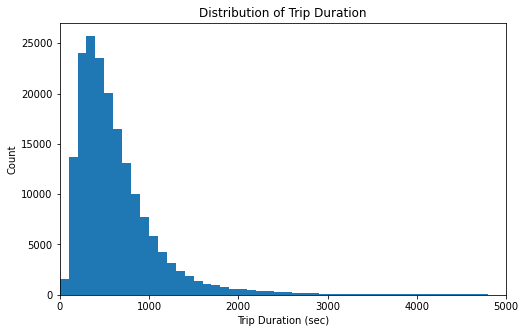

In [17]:
# start with  a standdar-scaled plot
binsize = 100
bins = np.arange(0,df_bike['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_bike, x = 'duration_sec', bins=bins)
plt.xlim(0, 5000)
plt.xlabel('Trip Duration (sec)')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration')
plt.show()

The trip duration in sec distribution is highly right-skewed with a long tail .I will the  duration variable to minute instead of second  and also try to know  how long the average trip take

In [18]:
# convert dthe  trip duration variable into minutes
df_bike['duration_min'] = df_bike['duration_sec'] / 60
#drop  the duration_sec column
df_bike.drop('duration_sec',axis = 1, inplace = True)

df_bike['duration_min']


0          869.750000
1          708.683333
2         1030.900000
3          608.166667
4           26.416667
             ...     
183407       8.000000
183408       5.216667
183409       2.350000
183410       2.316667
183411       4.516667
Name: duration_min, Length: 183412, dtype: float64

The time duration of average trip taken is 12.1 minutes.


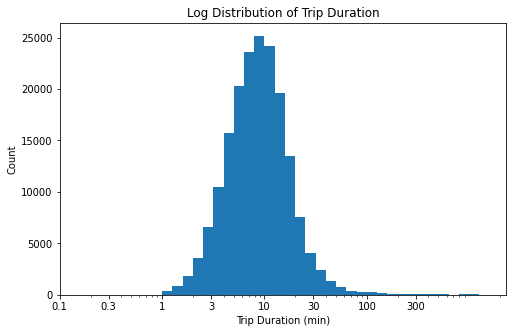

In [19]:
# print the average trip duration 
average_trip_duration = np.round(df_bike['duration_min'].mean(),2)
print("The time duration of average trip taken is %s minutes."%(average_trip_duration))


# trip duration distribution in log scale
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df_bike['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = df_bike, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (min)')
plt.ylabel('Count')
plt.title('Log Distribution of Trip Duration')
plt.show();

Now we get a the duration distribution looks like hiaghly unimodal , with the peak around 10 minutes , the average is around  12 minute

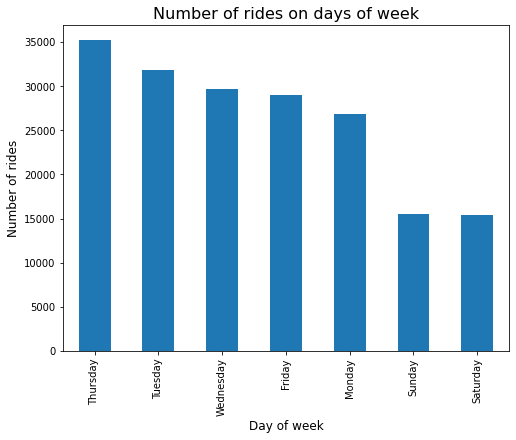

In [20]:
# plot a graph to see how many rides were taken on different weekdays
plt.figure(figsize=[8, 6])
df_bike.groupby('day_of_week').count().sort_values('duration_min', ascending=False).duration_min.plot(kind='bar')
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides on days of week', fontsize=16);

we can see that the maximum number of rides were taken
in the day of thursday  and the least in  the day of Saturday and Sunday

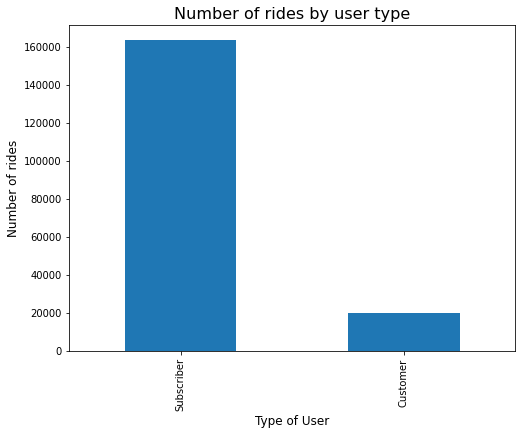

In [21]:
# plot a graph for number of rides taken by customers and subscribers

plt.figure(figsize=[8, 6])
df_bike.groupby('user_type').count().sort_values('duration_min', ascending=False).duration_min.plot(kind='bar')
plt.xlabel('Type of User', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides by user type', fontsize=16);

this shows that the number of rides by subscriber is the biggest compare to the Customer

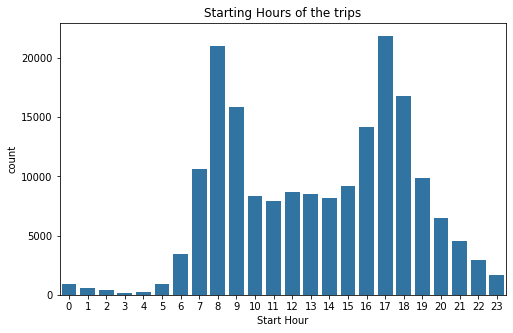

In [22]:
# plot distribution of day of week
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
sns.countplot(data = df_bike, x = 'start_hour', color = base_color)
plt.title('Starting Hours of the trips')
plt.xlabel('Start Hour')
plt.show()

this shows that most of the trips are started  between 8-9am and 5-6 pm (17-18) .it mean this is the hours people leave for work and home respectively.


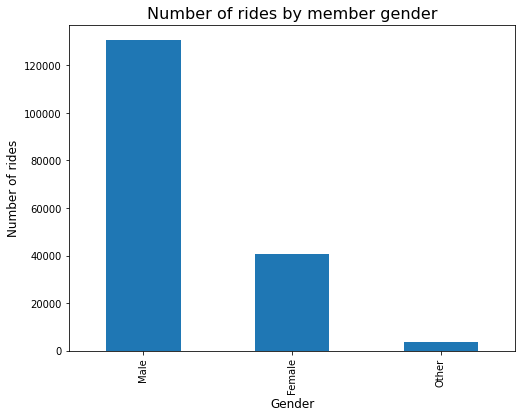

In [23]:
# plot distribution of gender
plt.figure(figsize=[8, 6])
df_bike.groupby('member_gender').count().sort_values('duration_min', ascending=False).duration_min.plot(kind='bar')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides by member gender', fontsize=16);

this shows that the Male used this systeme more than the Female

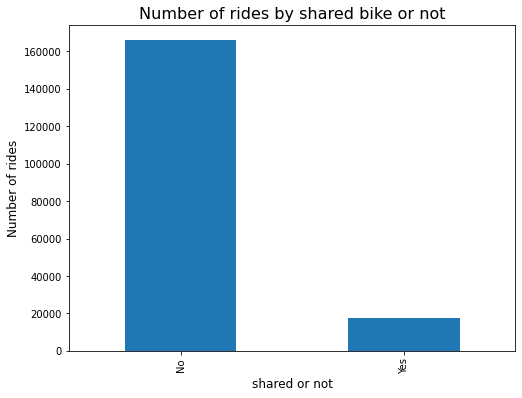

In [24]:
# plot distribution of gender
plt.figure(figsize=[8, 6])
df_bike.groupby('bike_share_for_all_trip').count().sort_values('duration_min', ascending=False).duration_min.plot(kind='bar')
plt.xlabel('shared or not', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides by shared bike or not', fontsize=16);

we can see that the number of rides by not shared bikes is more important than those by shared bikes

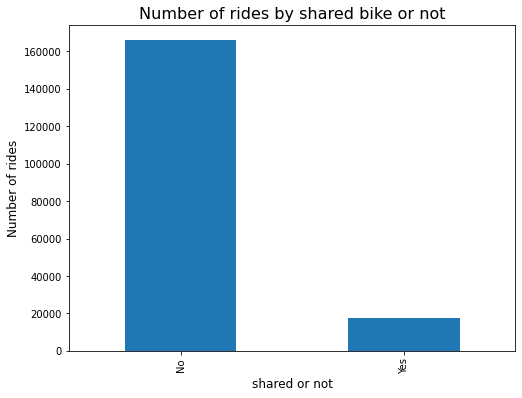

In [25]:
plt.figure(figsize=[8, 6])
df_bike.groupby('bike_share_for_all_trip').count().sort_values('duration_min', ascending=False).duration_min.plot(kind='bar')
plt.xlabel('shared or not', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides by shared bike or not', fontsize=16);

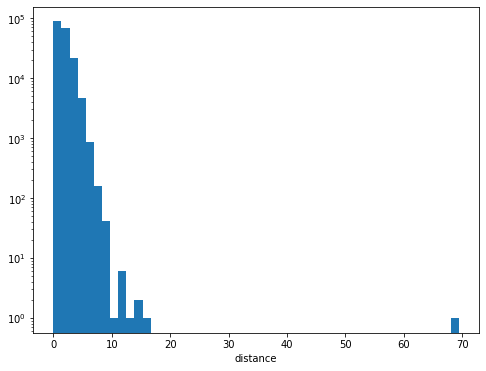

In [26]:
# It seems like that most of the rides are under 10 kms longs so lets decrease the bin size and apply logarithmic scaling
plt.figure(figsize=[8, 6])
df_bike.distance.hist(bins=50, log=True)
plt.grid(visible=None);
plt.xlabel('distance');

Most of the rides taken are less than 10kms long. Which clearly means the bikes are mostly used for short distance ride

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The variables duration_sec  look very right skewed. 
To treat the duration_sec, I needed to convert the duration from second to minute and then used a log transform which then made the resulting distribution to be slightly unimodal with the peak around 10 minutes while the mean of the distribution was around 12 minutes.

The day of the week with the most trips is Thursday followed by Tuesday and wednesday. Most of the people take rides during Weekdays from Monday to Friday compared to weekends
Trips are started mostly between 8-9am and 5-6pm (17-18)
Most trips are taken by the subscribers 

Most of the riders that's taken trips are males which was like mpre times that of the females.

 


Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


Data types of date related variables are changed to the appropriate ones. i perform to give new feature like 'day_of_week','start_hour', 'time_of_day', 'duration_min' and ' distance'.
i 've dropped some  variables that aren't of interest in the dataset

## Bivariate Exploration

In this section,  I investigate relationships between pairs of variables in the data

I look at the correlation bestween features in the data

In [27]:
numeric_vars = ['start_hour', 'duration_min','distance']
categoric_vars = ['user_type', 'member_gender', 'day_of_week', 'time_of_day']

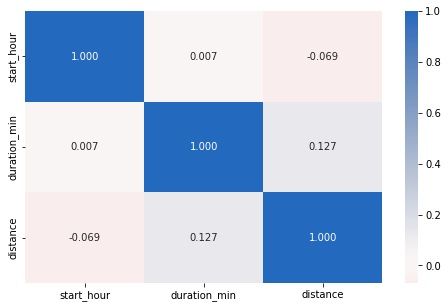

In [28]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df_bike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()


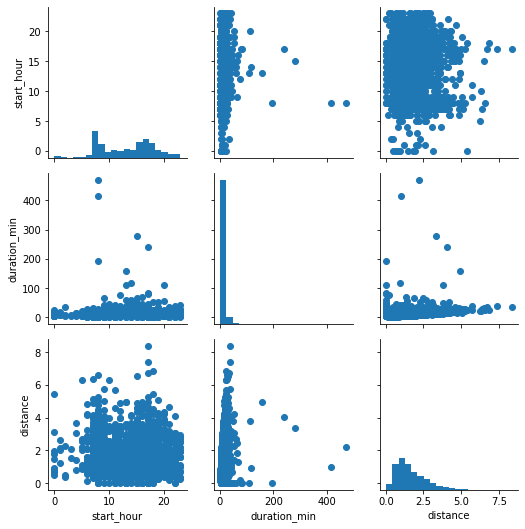

In [29]:
# plot matrix:
samples = np.random.choice(df_bike.shape[0], 1834, replace = False)
df_bike_samp = df_bike.loc[samples,:]

g = sns.PairGrid(data = df_bike_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

from the above we can   see  that start_hour and duration_min are in no way correlated with one another. we notice a negative correlation between  distance and  start_hour

Does the day of the week that most trips are taken dependent on if a user is a subscriber or a customer,?

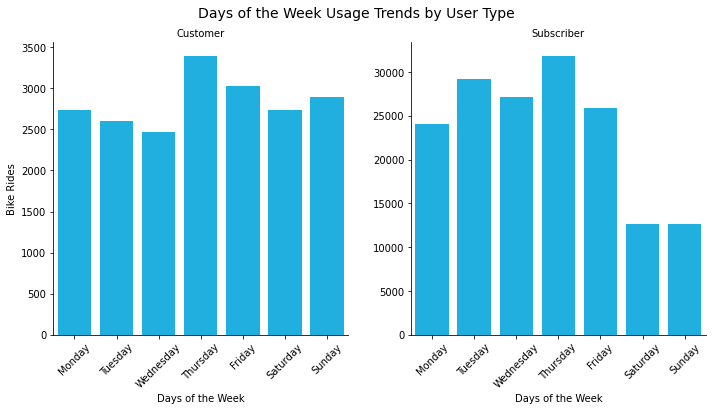

In [30]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

g = sns.catplot(data=df_bike, x='day_of_week', col="user_type", kind='count', sharey = False,
            color = 'deepskyblue',order = weekday)
g.set_axis_labels("Days of the Week", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Days of the Week Usage Trends by User Type', y=1.03, fontsize=14)
g.set_xticklabels(rotation = 45);

from the above bar graph , the day of the week that most trips are taken is not dependent  on if user is a subscriber  or a customer.We can see that customer  often use the services during the weekens where as Subscribers mostly  use the service during weekdays  from monday to friday

Does the day of the week that most trips are taken dependent on if a user is a male female ,?

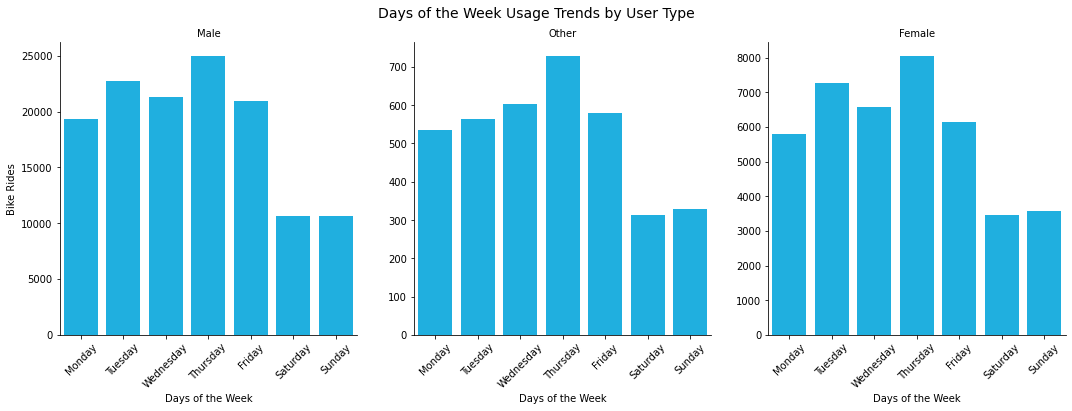

In [31]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

g = sns.catplot(data=df_bike, x='day_of_week', col="member_gender", kind='count', sharey = False,
            color = 'deepskyblue',order = weekday)
g.set_axis_labels("Days of the Week", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Days of the Week Usage Trends by User Type', y=1.03, fontsize=14)
g.set_xticklabels(rotation = 45);


Does the time of the day that most trips are taken dependent on if a user is a subscriber or a customer?

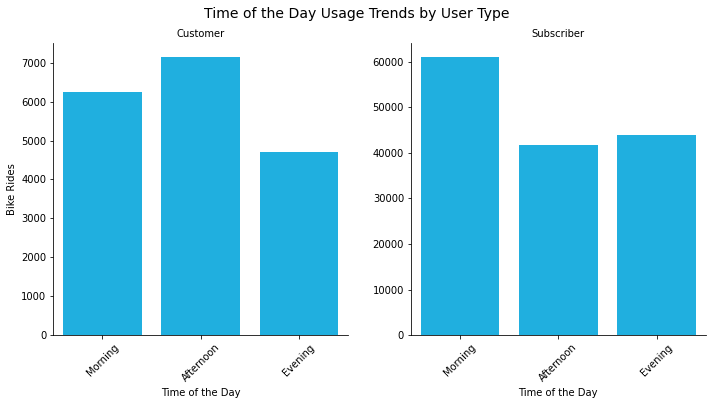

In [32]:
day_time = ['Morning', 'Afternoon', 'Evening']
g = sns.catplot(data=df_bike, x='time_of_day', col="user_type", kind='count', sharey = False,
            color = 'deepskyblue', order = day_time)
g.set_axis_labels("Time of the Day", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Time of the Day Usage Trends by User Type', y=1.03, fontsize=14)
g.set_xticklabels(rotation = 45);

From the above bar graph, the time of the day that most trips are taken (Afternoon and Morning) is slightly dependent on if a user is a subscriber or a customer. Customers often start the trip in the afternoon where as Subscribers mostly start the trip in the morning.

Does the average trip duration taken dependent on if a user is a subscriber or a customer?

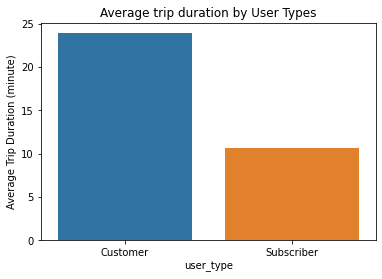

In [33]:
# Average trip duration mean plot
grouped_user_type_duration = df_bike[['user_type','duration_min']].groupby(['user_type'],as_index= False).mean()
# show analysis


sns.barplot(x='user_type', y='duration_min', data=grouped_user_type_duration)
plt.title("Average trip duration by User Types")
plt.ylabel("Average Trip Duration (minute)")
plt.show()

Subscriber users tend to ride the bikes in lesser duration than customer users. This might be because the subscriber users ride the bikes for regular commutes - work and school, but the customer users might be tourists that use the bikes for traveling around town

Does the average trip duration taken dependent on if a user is  male or femaale or other?

,member_gender,duration_min
0,Female,12.984506
1,Male,11.210651
2,Other,16.608589


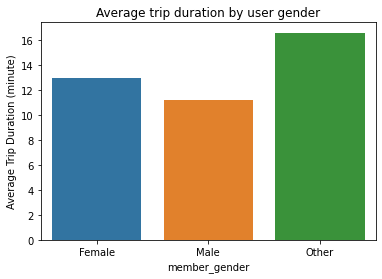

In [34]:
# Average trip duration mean plot
grouped_gender_type_duration = df_bike[['member_gender','duration_min']].groupby(['member_gender'],as_index= False).mean()
# show analysis
display(grouped_gender_type_duration)

sns.barplot(x='member_gender', y='duration_min', data=grouped_gender_type_duration)
plt.title("Average trip duration by user gender")
plt.ylabel("Average Trip Duration (minute)")
plt.show();

Unexpectedly, the "Other" type in gender has the highest trip duration on average.
the larger percentage of the users is female 

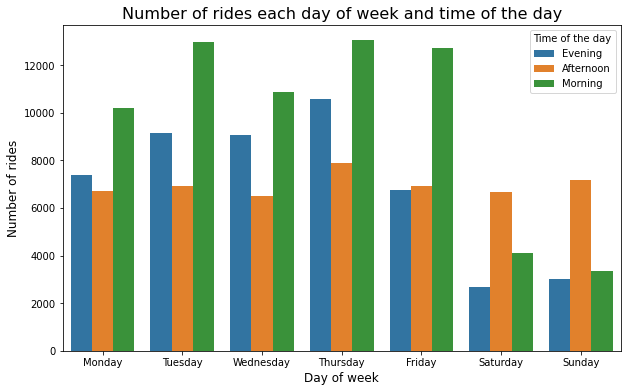

In [35]:
# plot a graph to see what time of the day rides are taken for each day of the week
plt.figure(figsize=[10, 6])
sns.countplot(data = df_bike, x = 'day_of_week', hue = 'time_of_day',order = weekday)
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides each day of week and time of the day', fontsize=16)
plt.legend(title = 'Time of the day');

Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The number of rides taken during mornings is much more than ones taken in afternoon or evening during weekdays


While on the Weekend the number of rides in afternoon are more than ones taken during morning or evening

Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Most of the rides taken are by the Subscribers, while customers tend to use these bikes a bit less.

Also the difference in the number of rides on weekends between customers and subscribers is much less as on weekdays

## Multivariate Exploration


Create plots of three or more variables to investigate your data even further. Make sure that your investigations are justified, and follow from your work in the previous sections.

Daily average trip duration for each user_type

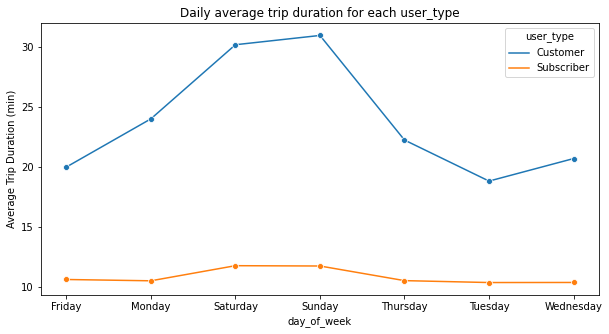

In [36]:
user_weekday_avg_min = df_bike.groupby(['user_type','day_of_week'], sort=True).duration_min.mean()
user_weekday_avg_min = user_weekday_avg_min.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sns.lineplot(data = user_weekday_avg_min, x='day_of_week', y='duration_min', hue='user_type', marker='o',sort = True
)

plt.title("Daily average trip duration for each user_type")
plt.ylabel('Average Trip Duration (min)');

On average, customers rides lasted longer than subscribers rides on every day of the week.

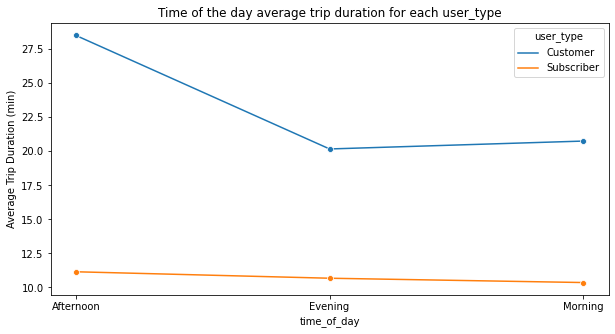

In [37]:
user_daytime_avg_min = df_bike.groupby(['user_type','time_of_day']).duration_min.mean()
user_daytime_avg_min = user_daytime_avg_min.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sns.lineplot(data = user_daytime_avg_min, x='time_of_day', y='duration_min', hue='user_type', marker='o',sort=False)
plt.title("Time of the day average trip duration for each user_type")
plt.ylabel('Average Trip Duration (min)');

We can  seen that the plots maintained a slighly constant trip durations for both the morning and night time for the two user types groups while there is a huge rise/increase in the average trip for the customers in the afternoon. This is because, customers mostly start their trip during the afternoon time.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


I extended my investigation of the dependency of the user_type on the average trip duration, days of the week and the time of the day in this section by looking at the relationship between the features.

. The multivariate exploration here showed that there indeed is a dependency of the average trip duration on if a user is a subscriber or a customer. On average, customers rides lasted longer than subscribers rides on every day of the week and time of the day.


### Were there any interesting or surprising interactions between features?

The total duration of sec the bikes were riddden by Customers most of it was on weekend (Saturday/Sunday).
Tuesday's and Friday's are the days when most of the rides are concentrated.

## Conclusions

from this exploration we finds the different features that were more dependent on each other like duration_sec ,user_type ,day_of_week, time_of_day

In [38]:
# # export the new dataset
#df_bike.to_csv("clean-fordgobike-tripdata.csv", index=False)